In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('cleaned_response_times.csv')

In [15]:
month_conv = {
        "Jan": 0,
        "Feb": 1,
        "Mar": 2,
        "Apr": 3,
        "May": 4,
        "Jun": 5,
        "Jul": 6,
        "Aug": 7,
        "Sep": 8,
        "Oct": 9,
        "Nov": 10,
        "Dec": 11,
    }

dow_conv = {
    "Sun": 0,
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
}

In [73]:
my_data = []

# normalize response time
updated_response_time = []
miny = min(df['response_time'])
maxy = max(df['response_time'])
for x in range(len(df['response_time'])):
    updated_response_time.append((df['response_time'][x]))
my_data.append(updated_response_time)

# normalize text length
updated_text_length = []
miny = min(df['text_length'])
maxy = max(df['text_length'])
for x in range(len(df['text_length'])):
    updated_text_length.append((df['text_length'][x]))
my_data.append(updated_text_length)

# update day
updated_day = []
miny = 0
maxy = 6
for x in range(len(df['day'])):
    updated_day.append((dow_conv[df['day'][x]]))
my_data.append(updated_day)

# update day
updated_month = []
miny = 0
maxy = 11
for x in range(len(df['month'])):
    updated_month.append((month_conv[df['month'][x]]))
my_data.append(updated_month)

#update date
updated_date = []
miny = 1
maxy = 31
for x in range(len(df['date'])):
    updated_date.append((df['date'][x]))
my_data.append(updated_date)

my_data = np.array(my_data)
my_data = np.transpose(my_data)

In [34]:
print(my_data)

[[4.70517259e-07 2.40816327e-01 3.33333333e-01 8.18181818e-01
  1.00000000e+00]
 [1.94928579e-07 8.57142857e-02 3.33333333e-01 8.18181818e-01
  1.00000000e+00]
 [2.74916513e-06 1.61224490e-01 3.33333333e-01 8.18181818e-01
  1.00000000e+00]
 ...
 [3.56248782e-07 1.97959184e-01 5.00000000e-01 9.09090909e-01
  7.00000000e-01]
 [1.73083135e-06 2.48979592e-01 5.00000000e-01 9.09090909e-01
  7.00000000e-01]
 [1.27106877e-04 1.12244898e-01 5.00000000e-01 9.09090909e-01
  7.00000000e-01]]


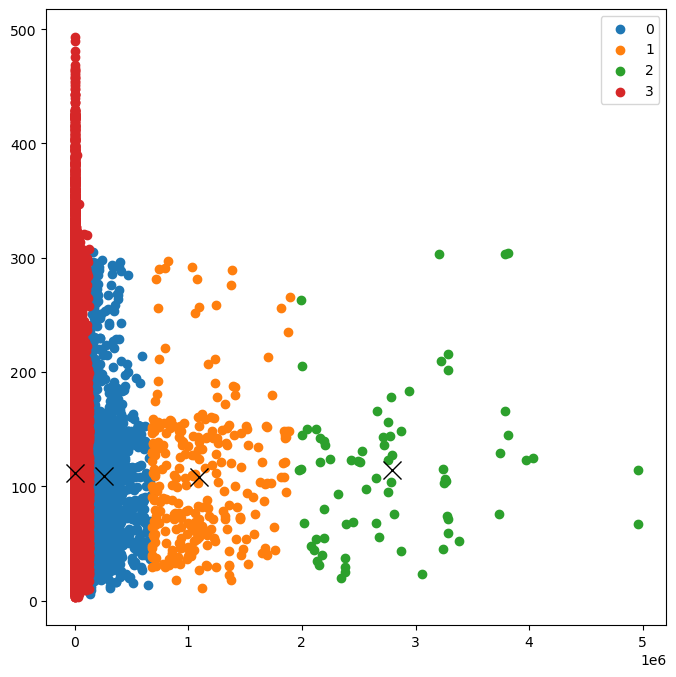

In [74]:
# cluster the data
k = 4
kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=4, random_state=0)
y_kmeans = kmeans_cluster.fit(my_data)
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(my_data)
unique_labels = np.unique(label)

# plot the clusters
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(my_data[label == i, 0], my_data[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=1, color='k', zorder=4)
plt.legend()

# plt.scatter(my_data[y_kmeans==0, 0], my_data[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(my_data[y_kmeans==1, 0], my_data[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(my_data[y_kmeans==2, 0], my_data[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(my_data[y_kmeans==3, 0], my_data[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

#plt.show()
plt.savefig('plot.png')

In [37]:
print(y_kmeans)

[1 1 1 ... 2 2 2]
